# Topic Modeling (BERTopic)

In [1]:
!pip install bertopic umap-learn sentence-transformers


  Using cached bertopic-0.17.3-py3-none-any.whl.metadata (24 kB)
  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached sentence_transformers-5.0.0-py3-none-any.whl.metadata (16 kB)
  Using cached hdbscan-0.8.40-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached transformers-4.53.2-py3-none-any.whl.metadata (40 kB)
  Using cached huggingface_hub-0.33.4-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached bertopic-0.17.3-py3-none-any.whl (153 kB)
Using cached umap_learn-0.5.9.post2-py3-none-any.whl (90 kB)
Using cached sentence_transformers-5.0.0-py3-none-any.whl (470 kB)
Using cached transformers-4.53.2-py3-none-any.whl (10.8 MB)
Using cached huggingface_hub-0.33.4-py3-none-any.whl (515 kB)
Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl (2.5 MB)
Using cached hdbscan-0.8.40-cp311-cp311-win_amd64.whl (732 

In [6]:
import pandas as pd

# Load your cleaned NASA comment file
df = pd.read_csv("../data/raw/climate_nasa.csv")  # Adjust if saved elsewhere
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
df.rename(columns={"text": "comment"}, inplace=True)

# If you saved preprocessed data in 'processed/' folder, load from there


In [8]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_comment"] = df["comment"].apply(clean_text)


In [9]:

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Use the cleaned comments
docs = df["clean_comment"].dropna().tolist()

# Create BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model
topics, probs = topic_model.fit_transform(docs)

# Store topics in DataFrame
df["topic"] = topics

# Show top topics
topic_model.get_topic_info().head(10)


2025-07-14 15:24:19,026 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2025-07-14 15:25:43,274 - BERTopic - Embedding - Completed ✓
2025-07-14 15:25:43,286 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-14 15:26:29,270 - BERTopic - Dimensionality - Completed ✓
2025-07-14 15:26:29,289 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-14 15:26:29,416 - BERTopic - Cluster - Completed ✓
2025-07-14 15:26:29,458 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-14 15:26:29,568 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1,-1_joe_figured_fix_it,"[joe, figured, fix, it, out, how, all, has, to, ]",[joe has it all figured out how to fix it]
1,0,424,0_the_to_of_and,"[the, to, of, and, is, in, that, we, it, are]",[you know how people say the earths climate ha...
2,1,59,1_bs_jusst_factvxrayy_vote,"[bs, jusst, factvxrayy, vote, jess, unfortunat...","[bs, bs, re ord being from somethinglolol]"
3,2,21,2_silva_american_motzi_spelling,"[silva, american, motzi, spelling, spelled, ke...",[john kerry to the rescue with his private jet...
4,3,17,3_de_anos_que_temperaturas,"[de, anos, que, temperaturas, no, dos, planeta...",[es triste todo lo que esta pasando todo se de...


In [10]:
# Interactive topic visualization
topic_model.visualize_topics()


In [11]:
# Word scores for most frequent topics
topic_model.visualize_barchart(top_n_topics=5)


In [13]:
# Re-import sentiment tools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

# Define function again
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)

def classify_sentiment(score_dict):
    compound = score_dict["compound"]
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Run sentiment analysis again
df["sentiment_scores"] = df["clean_comment"].apply(get_sentiment_scores)
df["sentiment_label"] = df["sentiment_scores"].apply(classify_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# View sample comments from topic 0
df[df["topic"] == 0][["comment", "sentiment_label"]].sample(5)


,comment,sentiment_label
366,I wonder if over population has anything to do...,Neutral
88,My question is to NASA. The air in a greenhous...,Negative
501,"In my opinion, there is no such thing as a phy...",Negative
58,Now they're aware.,Neutral
252,"BS, the democrats are behind this, 1 volcano c...",Negative


In [15]:
df.to_csv("../data/processed/nasa_comments_with_sentiment_topic.csv", index=False)


# Sentiment & Topic Trends Over Time (Yearly)

In [20]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Extract year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month


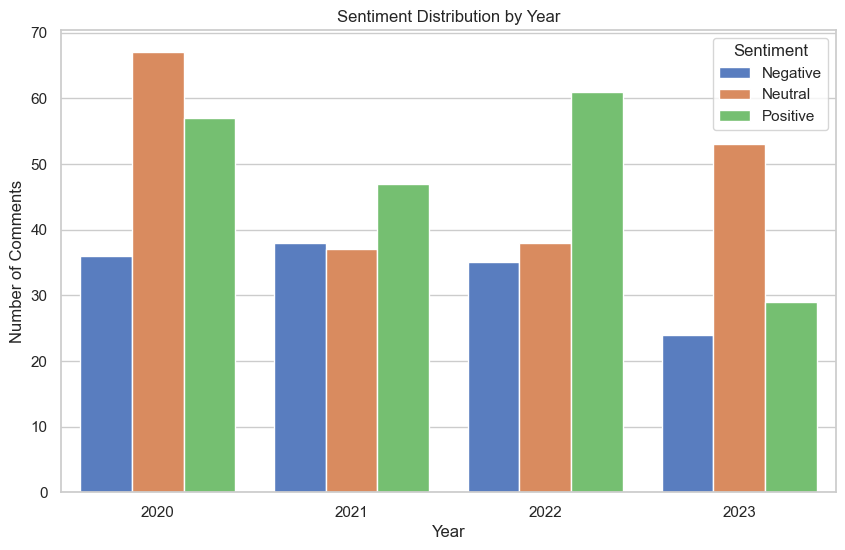

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="year", hue="sentiment_label", palette="muted")
plt.title("Sentiment Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.legend(title="Sentiment")
plt.show()


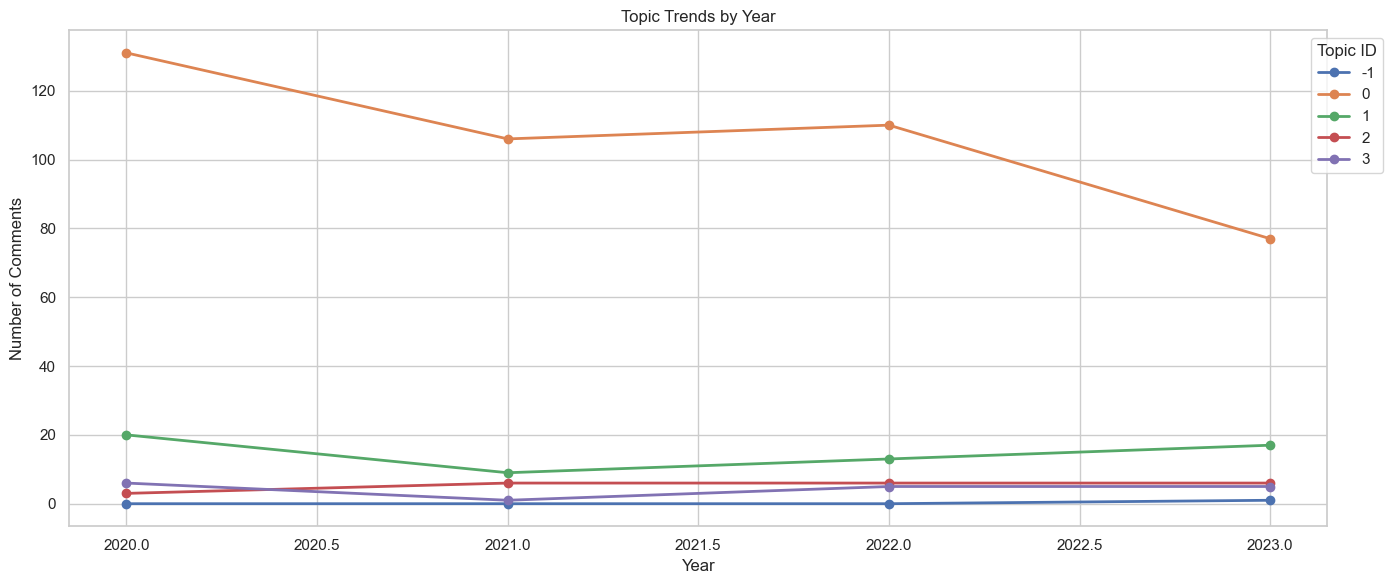

In [22]:
# Group and reshape
topic_trend = df.groupby(["year", "topic"]).size().unstack(fill_value=0)

# Plot as line chart
topic_trend.plot(kind="line", figsize=(14,6), marker='o', lw=2)
plt.title("Topic Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.legend(bbox_to_anchor=(1.05, 1), title="Topic ID")
plt.tight_layout()
plt.show()


In [23]:
# Save with all sentiment/topic columns
df.to_csv("../data/processed/nasa_comments_with_topics.csv", index=False)


# Top Comments per Topic

In [31]:
# Show 3 comments + sentiment per top 5 topics (if available)
for topic_id in df["topic"].value_counts().head(5).index:
    topic_comments = df[df["topic"] == topic_id][["comment", "sentiment_label"]]
    print(f"\n Topic {topic_id} Samples:")
    if len(topic_comments) >= 3:
        print(topic_comments.sample(3).to_string(index=False))
    else:
        print(topic_comments.to_string(index=False))



 Topic 0 Samples:
                                                                                                                                                                                                                                                                                                                                    comment sentiment_label
That normal because we are entering 12000 cycle. It happened before, mammoths extinguished så, neanderthals, Atlantis, Ice age, Great flood,... Men they all had healthy ocean som cooled down the planet and helped that few thousand people survived. Not we. From december 2024 we will be unable to stop changes and protect ourselves.        Positive
                                                                                                                     By 'people' hope they refer to the BIG GREEDY ones ,the big manufacturing industry ...we swim in an ocean of plastic everything , from packaging your bread to plastic c

# Topic Label Mapping (Human-Friendly Tags)

In [32]:
topic_labels = {
    0: "Climate Action Urgency",
    1: "Skepticism / Hoax Claims",
    2: "Scientific Warnings",
    3: "Support for NASA",
    4: "Calls for Policy Change"
}
df["topic_label"] = df["topic"].map(topic_labels)
